<a href="https://colab.research.google.com/github/niteshg97/Optimizing_Human_Activity_Recognition-HAR_Neural_Network_using_hls4ml-Quantization-and-Pruning/blob/main/Optimizing_a_HAR_Neural_Network_using_hls4ml_Quantization_and_Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

# For data loading and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


In [2]:
# Download the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

# Unzip the file
with zipfile.ZipFile('UCI HAR Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

# List the contents to verify
!ls -l "UCI HAR Dataset"

--2025-11-06 11:40:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [         <=>        ]  58.17M  34.1MB/s    in 1.7s    

2025-11-06 11:40:19 (34.1 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]

total 40
-rw-r--r-- 1 root root    80 Nov  6 11:40 activity_labels.txt
-rw-r--r-- 1 root root  2809 Nov  6 11:40 features_info.txt
-rw-r--r-- 1 root root 15785 Nov  6 11:40 features.txt
-rw-r--r-- 1 root root  6304 Nov  6 11:40 README.txt
drwxr-xr-x 3 root root  4096 Nov  6 11:40 test
drwxr-xr-x 3 root root  4096 Nov  6 11:40 train


# Load and Prepare the Data

In [3]:
# Define a helper function to load data
def load_data(path, file_type):
    X_path = os.path.join(path, file_type, f"X_{file_type}.txt")
    y_path = os.path.join(path, file_type, f"y_{file_type}.txt")

    X = np.loadtxt(X_path)
    y = np.loadtxt(y_path)
    return X, y

# Load the training and test data
dataset_path = "UCI HAR Dataset"
X_train, y_train = load_data(dataset_path, "train")
X_test, y_test = load_data(dataset_path, "test")
y_train = y_train - 1
y_test = y_test - 1

# Print the shapes to confirm
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7352, 561)
y_train shape: (7352,)
X_test shape: (2947, 561)
y_test shape: (2947,)


# Build the Keras Model

In [4]:
# Get the number of features and classes
n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))

model = keras.Sequential([
    keras.layers.Input(shape=(n_features,), name="input_layer"),
    keras.layers.Dense(64, activation='relu', name="dense_1"),
    keras.layers.Dense(32, activation='relu', name="dense_2"),
    keras.layers.Dense(n_classes, activation='softmax', name="output_layer")
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#  model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │        35,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,246 (149.40 KB)

 Trainable params: 38,246 (149.40 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [5]:
print("Starting model training...")

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("Model training complete.")

Starting model training...
Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6630 - loss: 0.8396 - val_accuracy: 0.8877 - val_loss: 0.2717
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9294 - loss: 0.1903 - val_accuracy: 0.9270 - val_loss: 0.1941
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9614 - loss: 0.1151 - val_accuracy: 0.9169 - val_loss: 0.1887
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.0996 - val_accuracy: 0.9430 - val_loss: 0.1459
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.0715 - val_accuracy: 0.9457 - val_loss: 0.1414
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0694 - val_accuracy: 0.9484 - val_loss: 0.1420
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0707 - val_accuracy: 0.9477 - val_loss: 0.1445
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss

# Evaluate the  Model

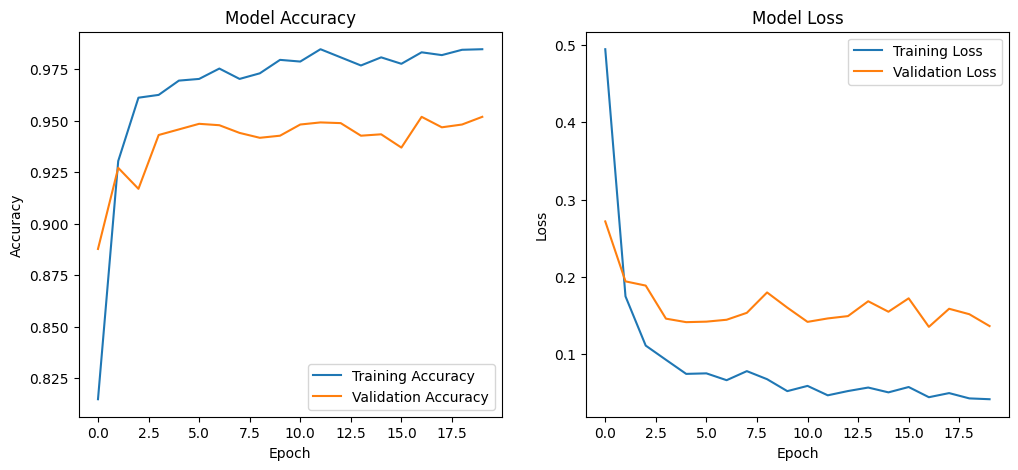

In [6]:
# 1. Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# 2. Evaluate on Test Set
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")


Evaluating model on test data...
Test Accuracy: 95.18%
Test Loss: 0.1363


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


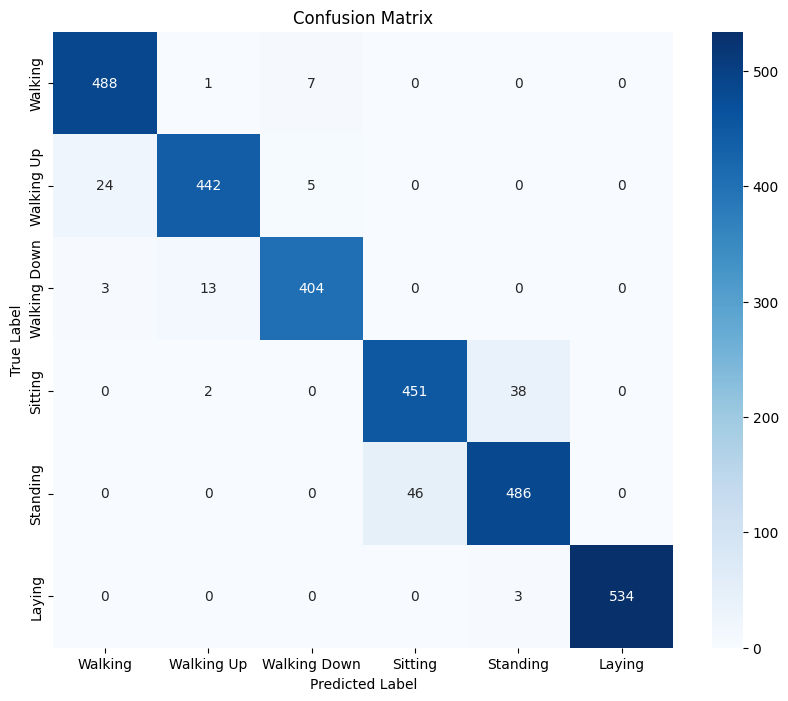

In [8]:
# 3. Plot Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
activity_labels = ['Walking', 'Walking Up', 'Walking Down', 'Sitting', 'Standing', 'Laying']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=activity_labels, yticklabels=activity_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the Final Model

* This is the most important step for the next phase. We save the trained model (architecture + weights) to a single HDF5 (.h5) file

In [9]:
# Save the model
model.save("har_model.h5")

# Verify the file was created
!ls -lh har_model.h5

-rw-r--r-- 1 root root 476K Nov  6 11:44 har_model.h5


## Phase 2:

* In Phase 2, we will take the har_model.h5 file we  created and use the ***hls4ml library*** , convert it from a software model into an actual hardware design (FPGA firmware).


* We will focus on two main "levers"

*A. Quantization: We will change the model from using 32-bit numbers (like a float) to using smaller, fixed-point numbers (ap_fixed<16,6>). This is the single biggest way to make the model smaller and faster.*

*B. Parallelization (Reuse Factor): We will adjust the "Reuse Factor" to control a key trade-off:*

* The goal of this phase is to take har_model.h5 file and use hls4ml to convert it into a hardware design. We'll then tune this design by changing its precision (quantization) and parallelism (Reuse Factor).

1. Configure the conversion.

2. Convert the model.

3. Run C-Simulation to check if our new quantized model is still accurate.

4. Write the HLS code.

# Step 2.1: Setup (Install, Import, Load)

In [10]:
import sys, os, json, zipfile, numpy as np, tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
!{sys.executable} -m pip install --quiet hls4ml==1.2.0
import hls4ml

print("TensorFlow:", tf.__version__)
print("hls4ml:", hls4ml.__version__)

# Download UCI HAR dataset if needed
if not os.path.exists("UCI HAR Dataset"):
    print("Downloading dataset...")
    !wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip -O UCI_HAR_Dataset.zip
    with zipfile.ZipFile("UCI_HAR_Dataset.zip", "r") as zip_ref:
        zip_ref.extractall()
    print("Extracted UCI HAR Dataset")

def load_data(path, file_type):
    X = np.loadtxt(os.path.join(path, file_type, f"X_{file_type}.txt"))
    y = np.loadtxt(os.path.join(path, file_type, f"y_{file_type}.txt"))
    return X, y

X_test, y_test = load_data("UCI HAR Dataset", "test")
y_test = y_test.astype(int) - 1
X_test_subset, y_test_subset = X_test[:1000], y_test[:1000]

print("Loading trained Keras model...")
model = tf.keras.models.load_model("har_model.h5")
print(model.summary())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.0 MB/s eta 0:00:00
TensorFlow: 2.19.0
hls4ml: 1.2.0


Loading trained Keras model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │        35,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,248 (149.41 KB)

 Trainable params: 38,246 (149.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


#Step 2.2: Config 1 (Full Parallel, Low Latency)

In [13]:
# Convert model WITHOUT softmax -> HLS, compile, test

import json, os, numpy as np, tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Load the original Keras model (with softmax)
orig_model = tf.keras.models.load_model('har_model.h5')
print("Original model summary:")
orig_model.summary()


model_json = json.loads(orig_model.to_json())
last_layer_name = orig_model.layers[-1].name
found = False
for layer in model_json['config']['layers']:
    if layer['config'].get('name') == last_layer_name:
        layer['config']['activation'] = 'linear'
        found = True
        break
if not found:
    raise RuntimeError("Could not find last layer in model JSON; inspect model.layers[-1].name")
model_no_softmax = tf.keras.models.model_from_json(json.dumps(model_json))
for layer in model_no_softmax.layers:
    try:
        w = orig_model.get_layer(layer.name).get_weights()
        layer.set_weights(w)
    except Exception:
        pass

print("Model without softmax summary:")
model_no_softmax.summary()

Original model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │        35,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,248 (149.41 KB)

 Trainable params: 38,246 (149.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model without softmax summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │        35,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,740 (448.21 KB)

 Trainable params: 38,246 (149.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,494 (298.81 KB)

# Step 2.3: Convert and Check Accuracy

 * Now, hls4ml will convert the model. Then, we'll run the C-Simulation (hls_model.predict()), it runs the generated C++ code to see if its answers match the original Keras model.

In [16]:
# Build an hls4ml config and ensure we don't request a softmax implementation
import hls4ml
config = hls4ml.utils.config_from_keras_model(model_no_softmax, granularity='name')

# Global settings (tweak as needed)
config['Model']['Precision'] = 'ap_fixed<16,6>'
config['Model']['ReuseFactor'] = 1
config['Model']['Strategy'] = 'Resource'
config['Model']['ClockPeriod'] = 5
config['IOType'] = 'io_parallel'
config['Part'] = 'xc7k160t-fbg484-1'

# (No softmax layer present in config when model has no softmax activation.)
print("Final hls4ml config (truncated):")
import pprint
pprint.pprint({k: config[k] for k in ('Model','IOType','Part')} , width=120)

# Convert & compile
outdir = 'hls_model_no_softmax'
hls_model = hls4ml.converters.convert_from_keras_model(
    model_no_softmax,
    hls_config=config,
    output_dir=outdir,
    part=config['Part'],
    io_type=config['IOType']
)

print("Compiling HLS C-simulation...")
hls_model.compile()
print("C-simulation compiled successfully!")

# Run predictions: the HLS model now outputs logits (same as model_no_softmax)
y_hls_logits = hls_model.predict(X_test_subset)
y_keras_logits = model_no_softmax.predict(X_test_subset)

# Compare by argmax
pred_hls = np.argmax(y_hls_logits, axis=1)
pred_keras = np.argmax(y_keras_logits, axis=1)

acc_keras = accuracy_score(y_test_subset, pred_keras)
acc_hls = accuracy_score(y_test_subset, pred_hls)
print(f"Keras (no-softmax) Accuracy: {acc_keras:.4f}")
print(f"hls4ml (no-softmax) Accuracy: {acc_hls:.4f}")

Final hls4ml config (truncated):
{'IOType': 'io_parallel',
 'Model': {'BramFactor': 1000000000,
           'ClockPeriod': 5,
           'Precision': 'ap_fixed<16,6>',
           'ReuseFactor': 1,
           'Strategy': 'Resource',
           'TraceOutput': False},
 'Part': 'xc7k160t-fbg484-1'}
Compiling HLS C-simulation...
C-simulation compiled successfully!
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Keras (no-softmax) Accuracy: 0.9390
hls4ml (no-softmax) Accuracy: 0.9390


# 2.4  Tune for Resources (The "ReuseFactor")
* We'll create a second hardware model, but this time, we'll make it resource-optimized (serial).

In [18]:
#  Create a Resource-Optimized (Serial) Model

import copy
config_2 = copy.deepcopy(config)
config_2['Model']['ReuseFactor'] = 64  # Set the ReuseFactor to 64
print("--- Configuration 2 (Resource Optimized) ---")
import pprint
pprint.pprint({k: config_2[k] for k in ('Model','IOType','Part')} , width=120)

# Convert & compile
outdir_2 = 'hls_model_2_serial'
hls_model_2 = hls4ml.converters.convert_from_keras_model(
    model_no_softmax,
    hls_config=config_2,
    output_dir=outdir_2,
    part=config_2['Part'],
    io_type=config_2['IOType']
)

print("\nCompiling HLS C-simulation (Config 2)...")
hls_model_2.compile()
print("C-simulation (Config 2) compiled successfully!")

# Run predictions
y_hls_logits_2 = hls_model_2.predict(X_test_subset)

# Compare by argmax
pred_hls_2 = np.argmax(y_hls_logits_2, axis=1)
acc_hls_2 = accuracy_score(y_test_subset, pred_hls_2)

print(f"\nhls4ml (Config 1, RF=1) Accuracy: {acc_hls:.4f}")
print(f"hls4ml (Config 2, RF=64) Accuracy: {acc_hls_2:.4f}")

--- Configuration 2 (Resource Optimized) ---
{'IOType': 'io_parallel',
 'Model': {'BitExact': None,
           'BramFactor': 1000000000,
           'ClockPeriod': 5,
           'Precision': 'ap_fixed<16,6>',
           'ReuseFactor': 64,
           'Strategy': 'Resource',
           'TraceOutput': False},
 'Part': 'xc7k160t-fbg484-1'}

Compiling HLS C-simulation (Config 2)...
C-simulation (Config 2) compiled successfully!

hls4ml (Config 1, RF=1) Accuracy: 0.9390
hls4ml (Config 2, RF=64) Accuracy: 0.9390


* ▶ we can see that accuracy is still identical. This proves we can change the hardware parallelism without affecting the mathematical result.

# Phase 3:Compression (Pruning)

* In Phase 2, we made the model smaller by making it slower (increasing ReuseFactor). Now, we will make the model itself smaller by removing unnecessary weights.

This will allow us to use a fast, parallel design (RF=1) that is also small and resource-efficient.



# Step 3.1: Install Pruning Library & Load Model

In [2]:
# Install the library for pruning
!pip install -q tensorflow-model-optimization

import tensorflow_model_optimization as tfmot
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os, zipfile

print("TensorFlow Model Optimization installed.")

def create_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(561,), name="input_layer"),
        keras.layers.Dense(64, activation='relu', name="dense_1"),
        keras.layers.Dense(32, activation='relu', name="dense_2"),
        keras.layers.Dense(6, activation='softmax', name="output_layer")
    ])
    return model

# Create the clean model and load the weights
model = create_model()
model.load_weights('har_model.h5')
print("Clean model created and weights loaded.")

# Load training data for fine-tuning
if not os.path.exists("UCI HAR Dataset"):
    print("Downloading dataset...")
    !wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip -O UCI_HAR_Dataset.zip
    with zipfile.ZipFile("UCI_HAR_Dataset.zip", "r") as zip_ref:
        zip_ref.extractall()

def load_data(path, file_type):
    X = np.loadtxt(os.path.join(path, file_type, f"X_{file_type}.txt"))
    y = np.loadtxt(os.path.join(path, file_type, f"y_{file_type}.txt"))
    return X, y

X_train, y_train = load_data("UCI HAR Dataset", "train")
y_train = y_train.astype(int) - 1
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(
        target_sparsity=0.80,
        begin_step=0,
        end_step=1000,
        frequency=100
    )
}


TensorFlow Model Optimization installed.
Clean model created and weights loaded.


# Step 3.2: Define, Compile, and Fine-Tune the Pruned Model

* We will "wrap" the original model with pruning layers and then "fine-tune" it (re-train it) for a few epochs. Fine-tuning is critical, as it allows the model to learn how to be accurate without the weights we're removing.

In [3]:
# Apply pruning
model_to_prune = prune_low_magnitude(model, **pruning_params)
print("\nSuccessfully wrapped model for pruning.")

# Compile and Fine-Tune
model_to_prune.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep()
]

print("Fine-tuning the pruned model...")
model_to_prune.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# New pruned model's summary
print("\nPruned model summary:")
model_to_prune.summary()


Successfully wrapped model for pruning.
Fine-tuning the pruned model...
Epoch 1/10
230/230 [==============================] - 4s 5ms/step - loss: 0.1133 - accuracy: 0.9721
Epoch 2/10
230/230 [==============================] - 1s 3ms/step - loss: 0.0596 - accuracy: 0.9833
Epoch 3/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0473 - accuracy: 0.9849
Epoch 4/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0402 - accuracy: 0.9865
Epoch 5/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9876
Epoch 6/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.9878
Epoch 7/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0343 - accuracy: 0.9872
Epoch 8/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9888
Epoch 9/10
230/230 [==============================] - 1s 3ms/step - loss: 0.0311 - accuracy: 0.9886
Epoch 10/10
230/230 [======

# Step 3.3: Strip Pruning Wrappers and Save
* The model is now trained, but it's wrapped in special prune_low_magnitude layers. To make it convertible by hls4ml, we must "strip" these wrappers, which leaves just the sparse weights.

In [5]:
# Remove the pruning wrappers to get a standard Keras model
model_pruned = tfmot.sparsity.keras.strip_pruning(model_to_prune)

print("\nFinal pruned model (stripped) summary:")
model_pruned.summary()

# Save this new,smaller model
model_pruned.save('har_model_pruned.h5')

!ls -lh har_model_pruned.h5 har_model.h5


Final pruned model (stripped) summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                35968     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 6)                 198       
                                                                 
Total params: 38246 (149.40 KB)
Trainable params: 38246 (149.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


-rw-r--r-- 1 root root 476K Nov  6 11:44 har_model.h5
-rw-r--r-- 1 root root 166K Nov  6 12:38 har_model_pruned.h5


# Step 3.4: Evaluate and Convert the Pruned Model
* We'll test the new pruned model's accuracy, then convert it using hls4ml just like we did in Phase 2.

In [1]:
from sklearn.metrics import accuracy_score
import hls4ml
import json, copy
import pprint
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os


print("Evaluating pruned model on test data...")

# Load test data
def load_data(path, file_type):
    X = np.loadtxt(os.path.join(path, file_type, f"X_{file_type}.txt"))
    y = np.loadtxt(os.path.join(path, file_type, f"y_{file_type}.txt"))
    return X, y
X_test, y_test = load_data("UCI HAR Dataset", "test")
y_test = y_test.astype(int) - 1
X_test_subset, y_test_subset = X_test[:1000], y_test[:1000]

# Load the pruned model
model_pruned = tf.keras.models.load_model('har_model_pruned.h5')
y_keras_pruned = model_pruned.predict(X_test_subset)
pred_keras_pruned = np.argmax(y_keras_pruned, axis=1)
acc_keras_pruned = accuracy_score(y_test_subset, pred_keras_pruned)
print(f"Pruned Keras Model Accuracy: {acc_keras_pruned:.4f}")
print("\nRe-creating base 'config'...")


# Define the model architecture
def create_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(561,), name="input_layer"),
        keras.layers.Dense(64, activation='relu', name="dense_1"),
        keras.layers.Dense(32, activation='relu', name="dense_2"),
        keras.layers.Dense(6, activation='softmax', name="output_layer")
    ])
    return model
orig_model = create_model()
orig_model.load_weights('har_model.h5')
print("Original model weights loaded successfully.")


# Create a 'no-softmax' version of the original model
model_json = json.loads(orig_model.to_json())
model_json['config']['layers'][-1]['config']['activation'] = 'linear'
model_no_softmax = tf.keras.models.model_from_json(json.dumps(model_json))
model_no_softmax.set_weights(orig_model.get_weights())

# Now create the config from it
config = hls4ml.utils.config_from_keras_model(model_no_softmax, granularity='name')
config['Model']['Precision'] = 'ap_fixed<16,6>'
config['Model']['ReuseFactor'] = 1
config['Model']['Strategy'] = 'Resource'
config['Model']['ClockPeriod'] = 5
config['IOType'] = 'io_parallel'
config['Part'] = 'xc7k160t-fbg484-1'

config_pruned = copy.deepcopy(config)
config_pruned['Model']['ReuseFactor'] = 1 # Keep it fast

print("\n--- Pruned hls4ml Config (RF=1) ---")
pprint.pprint({k: config_pruned[k] for k in ('Model','IOType','Part')} , width=120)
model_json_pruned = json.loads(model_pruned.to_json())
model_json_pruned['config']['layers'][-1]['config']['activation'] = 'linear'
model_pruned_no_softmax = tf.keras.models.model_from_json(json.dumps(model_json_pruned))
model_pruned_no_softmax.set_weights(model_pruned.get_weights())

# Convert & compile
outdir_pruned = 'hls_model_pruned'
hls_model_pruned = hls4ml.converters.convert_from_keras_model(
    model_pruned_no_softmax,
    hls_config=config_pruned,
    output_dir=outdir_pruned
)

print("\nCompiling Pruned HLS C-simulation...")
hls_model_pruned.compile()
print("Pruned C-simulation compiled successfully!")

# Final Comparison
print("\nRunning C-Simulations for comparison...")
y_hls_pruned = hls_model_pruned.predict(X_test_subset)
pred_hls_pruned = np.argmax(y_hls_pruned, axis=1)
acc_hls_pruned = accuracy_score(y_test_subset, pred_hls_pruned)
hls_model_orig = hls4ml.converters.convert_from_keras_model(model_no_softmax, hls_config=config, output_dir='hls_model_no_softmax')
hls_model_orig.compile()
y_hls_orig = hls_model_orig.predict(X_test_subset)
pred_hls_orig = np.argmax(y_hls_orig, axis=1)
acc_hls = accuracy_score(y_test_subset, pred_hls_orig)


print("\n--- FINAL ACCURACY COMPARISON ---")
print(f"Original hls4ml (RF=1) Accuracy: {acc_hls:.4f}")
print(f"Pruned hls4ml (RF=1) Accuracy:   {acc_hls_pruned:.4f}")

Evaluating pruned model on test data...


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Pruned Keras Model Accuracy: 0.9370

Re-creating base 'config'...
Original model weights loaded successfully.

--- Pruned hls4ml Config (RF=1) ---
{'IOType': 'io_parallel',
 'Model': {'BramFactor': 1000000000,
           'ClockPeriod': 5,
           'Precision': 'ap_fixed<16,6>',
           'ReuseFactor': 1,
           'Strategy': 'Resource',
           'TraceOutput': False},
 'Part': 'xc7k160t-fbg484-1'}

Compiling Pruned HLS C-simulation...
Pruned C-simulation compiled successfully!

Running C-Simulations for comparison...

--- FINAL ACCURACY COMPARISON ---
Original hls4ml (RF=1) Accuracy: 0.9390
Pruned hls4ml (RF=1) Accuracy:   0.9350
